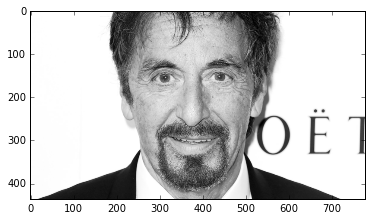

In [1]:
%matplotlib inline

from PIL import Image
from scipy import ndimage, misc
import io, cStringIO

import urllib2, urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# misc.imresize
# ndimage.filters.gaussian_filter

# fd = urllib2.urlopen("http://www.excelbridge.com/wp-content/uploads/2014/12/image.png")
# fd = urllib2.urlopen("http://www.factslides.com/imgs/s-Einstein.png")
fd = urllib2.urlopen("http://mediastorage.bauermedia.co.uk/67/23abc/3fdb3/42a41/b4b60/65cd1/5f61b/alpacino_778x436.png?1411648586")

# read the image file in a numpy array
img_l = plt.imread(fd)


# url='http://www.mendaily.com/wp-content/uploads/2012/10/Petronas-Towers-Kuala-Lumpur-Malaysia.jpg'
# img_l = Image.open(cStringIO.StringIO(urllib2.urlopen(url).read()))
# plt.imshow(img_l, cmap='Greys_r')
# plt.show()

# Creating a grayscale array from image 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = ((0.2989 * r + 0.5870 * g + 0.1140 * b ) * 255)//1

    return gray
# end rgb2gray

img_l = rgb2gray(img_l)
plt.imshow(img_l, cmap='Greys_r')
plt.show()

TypeError: 'JpegImageFile' object does not support indexing

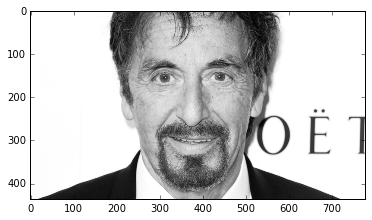

In [4]:
# resize the image 
img_l = misc.imresize(img_l,1.0/1.0)
img_l = img_l/255.0

# resize the image 
img_m = misc.imresize(img_l,1.0/1.25)
img_m = img_m/255.0

# resize the image again
img_s = misc.imresize(img_m, 1.0/1.25)
img_s = img_s/255.0

plt.imshow(img_l, cmap='Greys_r')
plt.show()


In [5]:
k = 2**(1.0/5.0)
g_a = 1
g_b = 1*k
g_c = 1*k**2
g_d = 1*k**3
g_e = 1*k**4

# Create Gaussian blur layers
img_s_blur = [None] * 5
img_s_blur[0] = ndimage.filters.gaussian_filter(img_s,g_a)
img_s_blur[1] = ndimage.filters.gaussian_filter(img_s,g_b)
img_s_blur[2] = ndimage.filters.gaussian_filter(img_s,g_c)
img_s_blur[3] = ndimage.filters.gaussian_filter(img_s,g_d)
img_s_blur[4] = ndimage.filters.gaussian_filter(img_s,g_e)

img_m_blur = [None] * 5
img_m_blur[0] = ndimage.filters.gaussian_filter(img_m,g_a)
img_m_blur[1] = ndimage.filters.gaussian_filter(img_m,g_b)
img_m_blur[2] = ndimage.filters.gaussian_filter(img_m,g_c)
img_m_blur[3] = ndimage.filters.gaussian_filter(img_m,g_d)
img_m_blur[4] = ndimage.filters.gaussian_filter(img_m,g_e)

img_l_blur = [None] * 5
img_l_blur[0] = ndimage.filters.gaussian_filter(img_l,1)
img_l_blur[1] = ndimage.filters.gaussian_filter(img_l,2)
img_l_blur[2] = ndimage.filters.gaussian_filter(img_l,3)
img_l_blur[3] = ndimage.filters.gaussian_filter(img_l,4)
img_l_blur[4] = ndimage.filters.gaussian_filter(img_l,5)

# Create DoG layers
img_s_dog = [None] * 4
img_s_dog[0] = img_s_blur[1] - img_s_blur[0]
img_s_dog[1] = img_s_blur[2] - img_s_blur[1]
img_s_dog[2] = img_s_blur[3] - img_s_blur[2]
img_s_dog[3] = img_s_blur[4] - img_s_blur[3]

img_m_dog = [None] * 4
img_m_dog[0] = img_m_blur[1] - img_m_blur[0]
img_m_dog[1] = img_m_blur[2] - img_m_blur[1]
img_m_dog[2] = img_m_blur[3] - img_m_blur[2]
img_m_dog[3] = img_m_blur[4] - img_m_blur[3]

img_l_dog = [None] * 4
img_l_dog[0] = img_l_blur[1] - img_l_blur[0]
img_l_dog[1] = img_l_blur[2] - img_l_blur[1]
img_l_dog[2] = img_l_blur[3] - img_l_blur[2]
img_l_dog[3] = img_l_blur[4] - img_l_blur[3]

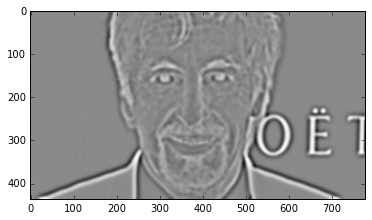

In [6]:

plt.imshow(img_l_dog[3], cmap='Greys_r')
plt.show()

In [7]:
def return_extrema(dog_set, img):
    extrema_x = []
    extrema_y = []
    print "xrange: ", len(dog_set[0])
    print "yrange: ", len(dog_set[0][0])

    # ITERATE OVER THE ALL INTERNAL BLUR LEVELS OF IMAGE
    for dog_level in range(1,3):
        # ITERATE OVER EACH BLUR LEVEL
        for y in range(1, len((dog_set[0])) - 1):
            for x in range(1, (len(dog_set[0][0])) - 1):
                # x,y coordinates of center of the 3x3 square
                max_v = -100000
                min_v =  100000
                for lvl in range(-1,2): # compare level below, current level and level above
                    for sq_y in range(-1,2): 
                        for sq_x in range(-1,2):                        
                            if not(lvl == 0 and sq_y == 0 and sq_x == 0):
                                # if any of the other points are equal, then it is not an extrema
                                if dog_set[dog_level + lvl][y+sq_y][x+sq_x] < min_v: 
                                    min_v = dog_set[dog_level + lvl][y+sq_y][x+sq_x]
                                if dog_set[dog_level + lvl][y+sq_y][x+sq_x] > max_v:
                                    max_v = dog_set[dog_level + lvl][y+sq_y][x+sq_x]
                if dog_set[dog_level][y][x] > max_v or dog_set[dog_level][y][x] < min_v:
                    extrema_x.append(x)
                    extrema_y.append(y)
    return (extrema_x, extrema_y)

xrange:  278
yrange:  497


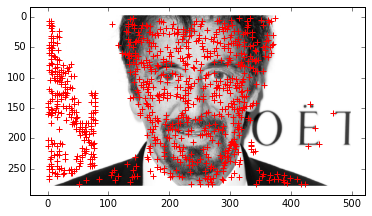

[141, 314, 374, 183, 243, 328, 3, 253, 279, 367, 190, 364, 6, 106, 132, 139, 206, 252, 5, 162, 155, 303, 8, 251, 164, 142, 153, 194, 292, 6, 235, 212, 282, 184, 262, 129, 240, 306, 148, 225, 324, 169, 277, 189, 327, 172, 223, 321, 212, 277, 150, 181, 248, 302, 361, 371, 223, 19, 300, 336, 6, 157, 249, 258, 290, 269, 149, 247, 146, 272, 308, 358, 6, 135, 227, 230, 278, 344, 214, 15, 173, 284, 301, 305, 315, 371, 3, 9, 133, 311, 368, 177, 227, 253, 289, 322, 333, 357, 170, 354, 366, 211, 2, 8, 290, 255, 5, 8, 185, 273, 166, 342, 134, 143, 2, 318, 367, 323, 231, 6, 179, 279, 309, 11, 137, 203, 257, 333, 148, 357, 13, 262, 323, 362, 218, 221, 298, 16, 145, 285, 342, 345, 161, 329, 153, 141, 166, 273, 5, 202, 226, 8, 16, 229, 295, 145, 179, 25, 164, 225, 316, 323, 332, 15, 12, 241, 170, 225, 2, 22, 33, 143, 170, 340, 5, 8, 19, 26, 136, 204, 274, 19, 189, 8, 210, 38, 43, 16, 22, 197, 233, 11, 151, 295, 321, 12, 214, 32, 184, 283, 228, 142, 157, 300, 319, 166, 241, 161, 267, 342, 22, 29, 231,

In [8]:
(ex_x_s, ex_y_s) = return_extrema(img_s_dog, img_s)

plt.imshow(img_s, cmap='Greys_r')
plt.scatter(ex_x_s,ex_y_s, marker='+', color="red", s=40)
plt.show()

print ex_x_s
print ex_y_s

xrange:  348
yrange:  622


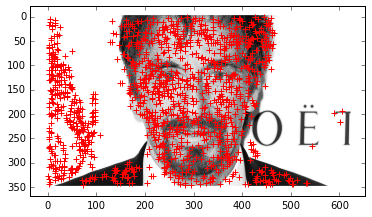

[287, 426, 444, 460, 217, 275, 304, 5, 298, 339, 162, 350, 393, 132, 183, 304, 399, 4, 224, 237, 339, 419, 457, 15, 297, 378, 450, 161, 165, 210, 422, 169, 16, 323, 253, 420, 10, 294, 355, 361, 396, 283, 173, 292, 295, 339, 207, 373, 266, 324, 9, 386, 405, 230, 237, 316, 458, 278, 427, 168, 258, 439, 320, 462, 185, 200, 434, 442, 135, 311, 428, 466, 316, 322, 20, 340, 226, 388, 461, 357, 384, 331, 381, 391, 14, 408, 157, 368, 218, 273, 399, 430, 201, 336, 418, 423, 243, 327, 387, 444, 348, 7, 200, 226, 293, 309, 413, 416, 193, 213, 240, 441, 396, 438, 128, 133, 172, 183, 292, 349, 366, 228, 307, 389, 214, 287, 415, 19, 186, 274, 335, 234, 271, 355, 388, 417, 260, 182, 146, 3, 167, 378, 457, 166, 192, 293, 413, 455, 3, 9, 409, 233, 248, 275, 186, 189, 364, 389, 461, 19, 355, 428, 248, 331, 362, 431, 446, 203, 240, 11, 237, 342, 355, 420, 3, 261, 305, 399, 187, 15, 203, 297, 224, 453, 36, 366, 405, 11, 309, 16, 318, 166, 276, 20, 143, 226, 388, 411, 3, 224, 323, 329, 335, 456, 417, 357, 

In [9]:
(ex_x_m, ex_y_m) = return_extrema(img_m_dog, img_m)

plt.imshow(img_m, cmap='Greys_r')
plt.scatter(ex_x_m,ex_y_m, marker='+', color="red", s=40)
plt.show()

print ex_x_m
print ex_y_m

xrange:  436
yrange:  778


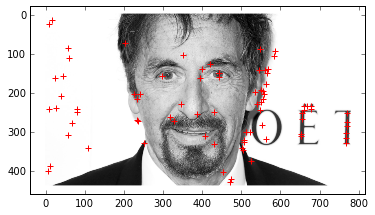

[17, 8, 547, 585, 584, 60, 567, 400, 560, 545, 442, 566, 296, 24, 395, 564, 549, 556, 242, 557, 39, 555, 550, 346, 661, 669, 678, 25, 7, 80, 678, 659, 547, 232, 236, 68, 552, 523, 57, 407, 562, 508, 507, 252, 109, 501, 524, 6, 202, 56, 351, 420, 444, 45, 442, 536, 226, 232, 541, 80, 430, 654, 769, 387, 318, 654, 329, 769, 769, 512, 768, 653, 653, 768, 767, 431, 503, 11, 454, 474, 470]
[14, 23, 87, 91, 105, 111, 138, 139, 140, 141, 148, 148, 157, 160, 160, 177, 193, 195, 201, 203, 208, 215, 223, 227, 232, 232, 232, 238, 240, 240, 241, 242, 244, 268, 270, 276, 281, 299, 308, 310, 316, 321, 326, 328, 339, 340, 374, 400, 71, 85, 103, 125, 149, 156, 158, 196, 202, 214, 229, 249, 249, 250, 250, 253, 260, 266, 270, 273, 285, 299, 301, 305, 309, 314, 327, 329, 345, 387, 401, 420, 426]


In [11]:
(ex_x_l, ex_y_l) = return_extrema(img_l_dog, img_l)

plt.imshow(img_l, cmap='Greys_r')
plt.scatter(ex_x_l,ex_y_l, marker='+', color="red", s=40)
plt.show()

print ex_x_l
print ex_y_l